# This notebook fits a basic CNN (Keras library) to the 357 samples

- Data input:
    - One hot encoding
    - tf-idf (5-gram)
- Imbalanced data:
    - naive oversampling of the tf-idf data
- Outcome:
    - The model overfits training data
    
- Future:
    - Potential solution to imbalanced data: https://academic.oup.com/bioinformatics/article/35/14/i31/5529256
    - Recurrent neural network
        - Sequences too long

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def parse_fasta(file):
    genomes = {}
    with open(file, "r") as f:
        for line in f:
            line = line.replace('\n', '')
            if line.startswith(">"):
                curr = line
                genomes[curr] = ''
                continue
            genomes[curr] = genomes[curr] + line
    return genomes

genbank_fasta = 'mycovirus_genbank_all_refseq_nucleotide_unique.fasta'
Sclerotinia_fasta = 'Sclerotinia_biocontrol_mycovirus_nucleotide.fasta'
genbank = parse_fasta(genbank_fasta)
Sclerotinia = parse_fasta(Sclerotinia_fasta)

all_sequences = [genbank[a] for a in genbank] + [Sclerotinia[a] for a in Sclerotinia]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='char')
X = count_vect.fit_transform(all_sequences)
chars = count_vect.get_feature_names()

In [3]:
chars

['a', 'c', 'g', 'k', 'n', 'r', 's', 't', 'w', 'y']

## One hot input + CNN

In [39]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(all_sequences)
idx = tokenizer.texts_to_sequences(all_sequences)
char_map = tokenizer.word_index
print(char_map)

{'a': 1, 'g': 2, 't': 3, 'c': 4, 'y': 5, 'r': 6, 'n': 7, 'k': 8, 'w': 9, 's': 10}


In [32]:
idx_array = np.array(idx)

In [33]:
idx_array.shape

(357,)

In [191]:
target_raw = [0 for i in range(350)] + [1 for i in range(7)]
target_raw = np.array(target_raw)
print(target_raw.shape)

(357,)


In [192]:
# Need the labels be binary one hot
target_one_hot = np.zeros((357, 2))
for r in range(input_one_hot.shape[0]):
    target_one_hot[r][target_raw[r]] = 1
print(target_one_hot.shape)

(357, 2)


In [193]:
print(target_one_hot.shape)

(357, 2)


In [40]:
# Pad inputs because of varied lengths
input_padded = pad_sequences(idx, maxlen=23635, padding='post')

In [45]:
print(input_padded[:5])
print(input_padded.shape)

[[2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 4 4 ... 0 0 0]
 [1 4 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]]
(357, 23635)


In [72]:
# Turn input into one hot matrix
input_one_hot = np.zeros((357, 23635, 11))
for r in range(input_padded.shape[0]):
    for c in range(input_padded.shape[1]):
        input_one_hot[r][c][input_padded[r][c]] = 1

In [84]:
# Reshape to meet keras requirement
print(input_one_hot.shape)
input_one_hot = input_one_hot[:,:,:,np.newaxis]
print(input_one_hot.shape)

(357, 23635, 11)
(357, 23635, 11, 1)


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_one_hot, target_one_hot, shuffle=True, test_size=0.3, random_state=46)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(249, 23635, 11, 1)
(249, 2)
(108, 23635, 11, 1)
(108, 2)


In [61]:
one_hot_shape = input_one_hot.shape
input_one_hot = input_one_hot[:,np.newaxis,:,:]
print(input_one_hot.shape)
print(input_one_hot[:5])

(357, 1, 23635, 11)
[[[[0. 0. 1. ... 0. 0. 0.]
   [0. 0. 1. ... 0. 0. 0.]
   [0. 0. 1. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 1. ... 0. 0. 0.]
   [0. 0. 1. ... 0. 0. 0.]
   [0. 0. 1. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 1. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]]


 [[[0. 1. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 1. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]]]


In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPooling1D

In [70]:
# A basic CNN used applied to one-hot input
def LeNet5():
    model = Sequential()
    model.add(Conv2D(filters=10,kernel_size=(5,5),padding='same',activation='tanh',input_shape=(23635, 11, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=20,kernel_size=(5,5),padding='same',activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(400,activation='tanh'))
    model.add(Dense(100,activation='tanh'))
    model.add(Dense(2,activation='softmax'))
    return model

In [71]:
model = LeNet5()
metrics =  ['acc']
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [93]:
model.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.1,shuffle=True)

Train on 224 samples, validate on 25 samples
Epoch 1/50
224/224 [==============================] - 56s 252ms/sample - loss: 0.3511 - acc: 0.9821 - val_loss: 3.1142e-06 - val_acc: 1.0000
Epoch 2/50
224/224 [==============================] - 54s 239ms/sample - loss: 0.2077 - acc: 0.9821 - val_loss: 4.3489e-05 - val_acc: 1.0000
Epoch 3/50
224/224 [==============================] - 56s 250ms/sample - loss: 0.1600 - acc: 0.9821 - val_loss: 7.7505e-04 - val_acc: 1.0000
Epoch 4/50
224/224 [==============================] - 57s 256ms/sample - loss: 0.1095 - acc: 0.9821 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 5/50
224/224 [==============================] - 56s 248ms/sample - loss: 0.0885 - acc: 0.9821 - val_loss: 0.0387 - val_acc: 1.0000
Epoch 6/50
224/224 [==============================] - 59s 264ms/sample - loss: 0.0973 - acc: 0.9821 - val_loss: 0.0345 - val_acc: 1.0000
Epoch 7/50
224/224 [==============================] - 56s 249ms/sample - loss: 0.0930 - acc: 0.9821 - val_loss: 0.0218 - 

In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 23635, 11, 10)     260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11817, 5, 10)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11817, 5, 20)      5020      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5908, 2, 20)       0         
_________________________________________________________________
flatten (Flatten)            (None, 236320)            0         
_________________________________________________________________
dense (Dense)                (None, 400)               94528400  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
__________

### The following predictions on test set and even training set show the model fails utterly. Maybe I have missed something.

In [95]:
model.predict(X_test)

array([[0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.

In [241]:
model.predict(X_train[50:60])

array([[0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754],
       [0.98219246, 0.01780754]], dtype=float32)

## 5-gram tf-idf input (without oversampling) 

In [163]:
# 5-gram features generation
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(analyzer='char',ngram_range=(1,5))
X = count_vect.fit_transform(all_sequences)
chars = count_vect.get_feature_names()
five_gram = X.toarray()
tf_transformer = TfidfTransformer(use_idf=True).fit(five_gram)
five_gram_tf = tf_transformer.transform(five_gram)
five_gram_tf = five_gram_tf.toarray()

X_train_5g, X_test_5g, y_train_5g, y_test_5g = train_test_split(five_gram_tf, target_one_hot, shuffle=True, test_size=0.3, random_state=46)
print(X_train_5g.shape)
print(y_train_5g.shape)
print(X_test_5g.shape)
print(y_test_5g.shape)

(249, 1840)
(249, 2)
(108, 1840)
(108, 2)


In [164]:
X_train_5g = X_train_5g[:,:,np.newaxis]
X_test_5g = X_test_5g[:,:,np.newaxis]

In [165]:
X_train_5g.shape

(249, 1840, 1)

In [167]:
def LeNet5_5g():
    model = Sequential()
    model.add(Conv1D(filters=10,kernel_size=5,padding='same',activation='tanh'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=20,kernel_size=5,padding='same',activation='tanh'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(200,activation='tanh'))
    model.add(Dense(100,activation='tanh'))
    model.add(Dense(2,activation='softmax'))
    return model

In [168]:
model_5g = LeNet5_5g()
metrics =  ['acc']
model_5g.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [169]:
model_5g.fit(X_train_5g,y_train_5g,batch_size=64,epochs=50,validation_split=0.1,shuffle=True,verbose=1)

Train on 224 samples, validate on 25 samples
Epoch 1/50
224/224 [==============================] - 1s 5ms/sample - loss: 0.3913 - acc: 0.7366 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 2/50
224/224 [==============================] - 0s 2ms/sample - loss: 0.1225 - acc: 0.9821 - val_loss: 1.3675e-04 - val_acc: 1.0000
Epoch 3/50
224/224 [==============================] - 0s 2ms/sample - loss: 0.1655 - acc: 0.9821 - val_loss: 2.2045e-04 - val_acc: 1.0000
Epoch 4/50
224/224 [==============================] - 0s 2ms/sample - loss: 0.1372 - acc: 0.9821 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 5/50
224/224 [==============================] - 0s 2ms/sample - loss: 0.0987 - acc: 0.9821 - val_loss: 0.0524 - val_acc: 1.0000
Epoch 6/50
224/224 [==============================] - 0s 2ms/sample - loss: 0.0979 - acc: 0.9821 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 7/50
224/224 [==============================] - 0s 2ms/sample - loss: 0.0915 - acc: 0.9821 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 8/5

In [171]:
model_5g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           multiple                  60        
_________________________________________________________________
max_pooling1d_12 (MaxPooling multiple                  0         
_________________________________________________________________
conv1d_13 (Conv1D)           multiple                  1020      
_________________________________________________________________
max_pooling1d_13 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_7 (Flatten)          multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  1840200   
_________________________________________________________________
dense_22 (Dense)             multiple                  20100     
__________

In [172]:
history = model_5g.history

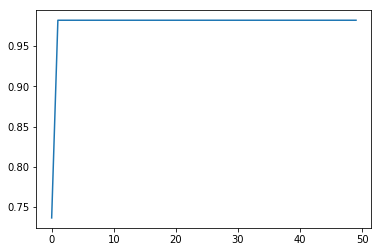

In [173]:
plt.plot(history.history['acc'])

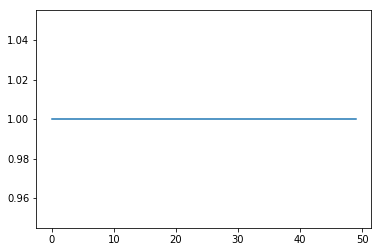

In [174]:
plt.plot(history.history['val_acc'])

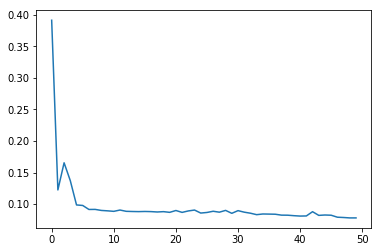

In [175]:
plt.plot(history.history['loss'])

### The following shows that again the model fails on both training and test sets due to imbalanced data

In [237]:
model_5g.predict(X_test_5g)

array([[0.98618186, 0.01381813],
       [0.99674326, 0.00325682],
       [0.9954325 , 0.00456751],
       [0.9478614 , 0.05213862],
       [0.9916256 , 0.00837442],
       [0.9735815 , 0.02641847],
       [0.99458885, 0.00541117],
       [0.97325814, 0.02674187],
       [0.9959215 , 0.00407844],
       [0.9857174 , 0.01428256],
       [0.9970413 , 0.00295868],
       [0.96038437, 0.03961563],
       [0.99718106, 0.0028189 ],
       [0.9394887 , 0.06051136],
       [0.9794993 , 0.02050077],
       [0.93742025, 0.06257982],
       [0.9839923 , 0.0160077 ],
       [0.9255737 , 0.07442628],
       [0.9902935 , 0.00970652],
       [0.9833329 , 0.01666721],
       [0.9851252 , 0.01487479],
       [0.9771482 , 0.02285176],
       [0.9872016 , 0.01279847],
       [0.98327386, 0.01672613],
       [0.9126224 , 0.08737756],
       [0.9052734 , 0.09472664],
       [0.994371  , 0.00562906],
       [0.99508744, 0.0049126 ],
       [0.99528354, 0.00471645],
       [0.91462326, 0.08537681],
       [0.

In [239]:
(model_5g.predict(X_train_5g)-y_train_5g)[50:60]

array([[-0.01392096,  0.01392091],
       [-0.03648239,  0.03648242],
       [-0.00678271,  0.00678276],
       [-0.02838707,  0.02838707],
       [ 0.93164873, -0.93164869],
       [-0.03631246,  0.03631249],
       [-0.06259656,  0.06259655],
       [-0.00396532,  0.0039653 ],
       [ 0.94249499, -0.94249499],
       [-0.00470006,  0.00470006]])

## 5-gram tf-idf input with oversampling (positive:negative=1)

Code below does naive oversampling by duplicating positive samples to have a (almost) 1:1 training set. This is of course done with the test set isolated.

In [185]:
five_gram_tf = five_gram_tf[:-7]
five_gram_tf.shape

(350, 1840)

In [182]:
positive_5g = five_gram_tf[-7:]

In [183]:
positive_5g.shape

(7, 1840)

In [195]:
positive_target = target_one_hot[-7:]
print(positive_target)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [190]:
X_train_5g_os, X_test_5g_os, y_train_5g_os, y_test_5g_os = train_test_split(five_gram_tf, target_one_hot, shuffle=True, test_size=0.3, random_state=46)
print(X_train_5g_os.shape)
print(y_train_5g_os.shape)
print(X_test_5g_os.shape)
print(y_test_5g_os.shape)

(245, 1840)
(245, 2)
(105, 1840)
(105, 2)


In [198]:
np.random.shuffle(positive_5g)
positive_train = positive_5g[:4]
positive_target_train = positive_target[:4]
oversampling_steps = int(240/4)
for i in range(oversampling_steps):
    X_train_5g_os = np.concatenate((X_train_5g_os, positive_train), axis=0)
    y_train_5g_os = np.concatenate((y_train_5g_os, positive_target_train), axis=0)

In [206]:
print(X_train_5g_os.shape)
print(y_train_5g_os.shape)
X_train_5g_os = X_train_5g_os[:, :, np.newaxis]
print(X_train_5g_os.shape)

(485, 1840)
(485, 2)
(485, 1840, 1)


In [207]:
model_5g_os = LeNet5_5g()
metrics =  ['acc']
model_5g_os.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [208]:
model_5g_os.fit(X_train_5g_os,y_train_5g_os,batch_size=64,epochs=100,validation_split=0.2,shuffle=True,verbose=1)

Train on 388 samples, validate on 97 samples
Epoch 1/100
388/388 [==============================] - 1s 3ms/sample - loss: 0.6759 - acc: 0.6289 - val_loss: 1.0055 - val_acc: 0.0000e+00
Epoch 2/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.6020 - acc: 0.6211 - val_loss: 1.0213 - val_acc: 0.0000e+00
Epoch 3/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.6001 - acc: 0.6314 - val_loss: 0.6519 - val_acc: 0.7526
Epoch 4/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.5345 - acc: 0.6933 - val_loss: 0.8623 - val_acc: 0.5052
Epoch 5/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.5052 - acc: 0.7397 - val_loss: 0.6763 - val_acc: 0.5052
Epoch 6/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.4677 - acc: 0.7552 - val_loss: 0.5525 - val_acc: 0.7526
Epoch 7/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.4266 - acc: 0.8144 - val_loss: 1.0331 - val_acc: 0.0000e+0

Epoch 61/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0545 - acc: 0.9923 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 62/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0477 - acc: 0.9923 - val_loss: 0.0200 - val_acc: 1.0000
Epoch 63/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0390 - acc: 0.9923 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 64/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0453 - acc: 0.9923 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 65/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0370 - acc: 0.9923 - val_loss: 0.0161 - val_acc: 1.0000
Epoch 66/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0443 - acc: 0.9923 - val_loss: 0.0436 - val_acc: 1.0000
Epoch 67/100
388/388 [==============================] - 1s 2ms/sample - loss: 0.0389 - acc: 0.9923 - val_loss: 9.3133e-04 - val_acc: 1.0000
Epoch 68/100
388/388 [======================

In [209]:
X_test_5g_os = np.concatenate((X_test_5g_os, positive_5g[4:]), axis=0)
y_test_5g_os = np.concatenate((y_test_5g_os, positive_target[4:]), axis=0)
print(X_test_5g_os.shape)
print(y_test_5g_os.shape)

(108, 1840)
(108, 2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           multiple                  60        
_________________________________________________________________
max_pooling1d_16 (MaxPooling multiple                  0         
_________________________________________________________________
conv1d_17 (Conv1D)           multiple                  1020      
_________________________________________________________________
max_pooling1d_17 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_27 (Dense)             multiple                  1840200   
_________________________________________________________________
dense_28 (Dense)             multiple                  20100     
__________

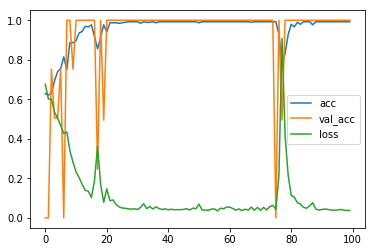

In [224]:
model_5g_os.summary()
history = model_5g_os.history
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.plot(history.history['loss'],label='loss')
plt.legend()

### The model still does not work on the test set (the predicted results are all negative):

In [215]:
model_5g_os.predict(X_test_5g_os[:, :, np.newaxis])

array([[9.97204065e-01, 2.79593165e-03],
       [9.99670625e-01, 3.29385948e-04],
       [9.99999881e-01, 1.00083966e-07],
       [9.98590052e-01, 1.40997244e-03],
       [9.99975920e-01, 2.41200632e-05],
       [9.99022603e-01, 9.77343298e-04],
       [9.99999285e-01, 7.71064663e-07],
       [1.00000000e+00, 1.42752947e-08],
       [9.99997139e-01, 2.91852689e-06],
       [2.29212618e-03, 9.97707844e-01],
       [9.99999762e-01, 1.97657215e-07],
       [9.99867678e-01, 1.32333662e-04],
       [9.98416305e-01, 1.58363068e-03],
       [7.94552863e-01, 2.05447122e-01],
       [9.99799311e-01, 2.00656606e-04],
       [1.00000000e+00, 3.07927621e-08],
       [9.99940515e-01, 5.94995290e-05],
       [9.99999762e-01, 2.43219233e-07],
       [1.00000000e+00, 5.93877525e-09],
       [9.99863744e-01, 1.36291870e-04],
       [9.98446882e-01, 1.55317993e-03],
       [9.99990940e-01, 9.09938990e-06],
       [9.99995470e-01, 4.55341660e-06],
       [9.99986410e-01, 1.36242234e-05],
       [9.960136

### However, it works for the training set (overfitting due to naive oversampling):

In [218]:
model_5g_os.predict(X_train_5g_os[-10:])

array([[0.0124291 , 0.9875709 ],
       [0.02145603, 0.97854394],
       [0.00229213, 0.99770784],
       [0.02217059, 0.97782946],
       [0.0124291 , 0.9875709 ],
       [0.02145603, 0.97854394],
       [0.00229213, 0.99770784],
       [0.02217059, 0.97782946],
       [0.0124291 , 0.9875709 ],
       [0.02145603, 0.97854394]], dtype=float32)

In [227]:
y_train_5g_os[-10:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])